<a href="https://colab.research.google.com/github/Vicente-VP/Brasilia_Demographic_Analysis/blob/main/Demographic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

dados = pd.read_csv('injuria-racial.csv', encoding='latin1')

dados.head()

,Tabela 1: Ocorrências de Injúria racial no DF;;;;;;;;
0,ANO;2014;2015;2016;2017;2018;2019;2020;2021
1,TOTAL;299;379;428;422;433;467;436;562
2,Fonte: Bco Millenium - COOAFESP/SGI/SSPDF;;;;;;;;


In [3]:
dados = dados.T

In [4]:
dados

,0,1,2
Tabela 1: Ocorrências de Injúria racial no DF;;;;;;;;,ANO;2014;2015;2016;2017;2018;2019;2020;2021,TOTAL;299;379;428;422;433;467;436;562,Fonte: Bco Millenium - COOAFESP/SGI/SSPDF;;;;;;;;


In [5]:
dados.columns=['ANO;2014;2015;2016;2017;2018;2019;2020;2021', 'TOTAL;299;379;428;422;433;467;436;562', 'Aleatorio']

In [6]:
print(dados.columns)

Index(['ANO;2014;2015;2016;2017;2018;2019;2020;2021',
       'TOTAL;299;379;428;422;433;467;436;562', 'Aleatorio'],
      dtype='object')


In [7]:
dados.drop('Aleatorio', axis=1, inplace=True)

In [8]:
dados

,ANO;2014;2015;2016;2017;2018;2019;2020;2021,TOTAL;299;379;428;422;433;467;436;562
Tabela 1: Ocorrências de Injúria racial no DF;;;;;;;;,ANO;2014;2015;2016;2017;2018;2019;2020;2021,TOTAL;299;379;428;422;433;467;436;562


In [9]:
dados.columns=['ANO', 'TOTAL']

In [10]:
dados

,ANO,TOTAL
Tabela 1: Ocorrências de Injúria racial no DF;;;;;;;;,ANO;2014;2015;2016;2017;2018;2019;2020;2021,TOTAL;299;379;428;422;433;467;436;562


In [11]:
tentativa = dados['ANO']

In [12]:
tentativa

,ANO
Tabela 1: Ocorrências de Injúria racial no DF;;;;;;;;,ANO;2014;2015;2016;2017;2018;2019;2020;2021


In [13]:
dados.reset_index(drop=True, inplace=True)

In [14]:
dados

,ANO,TOTAL
0,ANO;2014;2015;2016;2017;2018;2019;2020;2021,TOTAL;299;379;428;422;433;467;436;562


In [15]:
valor = dados.loc[0, "ANO"]

In [16]:
total = dados.loc[0,'TOTAL']

In [17]:
valor = valor.split(";")

In [18]:
valor.pop(0)

'ANO'

In [19]:
valor

['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

In [20]:
novas_linhas = pd.DataFrame({'ANO': valor})

In [21]:
novas_linhas

,ANO
0,2014
1,2015
2,2016
3,2017
4,2018
5,2019
6,2020
7,2021


In [22]:
dados

,ANO,TOTAL
0,ANO;2014;2015;2016;2017;2018;2019;2020;2021,TOTAL;299;379;428;422;433;467;436;562


In [23]:
dados.drop([0], inplace=True)

In [24]:
dados = pd.concat([dados, novas_linhas], ignore_index=True)

In [25]:
dados.to_csv('injuria-racial.csv', index=False)

In [26]:
dados

,ANO,TOTAL
0,2014,NaN
1,2015,NaN
2,2016,NaN
3,2017,NaN
4,2018,NaN
5,2019,NaN
6,2020,NaN
7,2021,NaN


In [27]:
total = total.split(";")

In [28]:
total.pop(0)

'TOTAL'

In [29]:
total

['299', '379', '428', '422', '433', '467', '436', '562']

In [30]:
total_injurias = pd.DataFrame({'TOTAL': total})
total_injurias

,TOTAL
0,299
1,379
2,428
3,422
4,433
5,467
6,436
7,562


In [31]:
dados

,ANO,TOTAL
0,2014,NaN
1,2015,NaN
2,2016,NaN
3,2017,NaN
4,2018,NaN
5,2019,NaN
6,2020,NaN
7,2021,NaN


In [32]:
dados.loc[0:7, 'TOTAL'] = total_injurias['TOTAL']

In [33]:
dados.to_csv('seu_arquivo_atualizado.csv', index=False)

In [34]:
print(dados)

    ANO TOTAL
0  2014   299
1  2015   379
2  2016   428
3  2017   422
4  2018   433
5  2019   467
6  2020   436
7  2021   562


In [35]:
dados['TOTAL'] = dados['TOTAL'].astype(int)

In [36]:
total_ocorrencias = dados['TOTAL'].sum()

In [37]:
media_total = dados['TOTAL'].mean()

In [38]:
grafico_media = {
    "labels": ['Média', 'Total'],
    "values": [media_total, total_ocorrencias]
}

df = pd.DataFrame(grafico_media)

<Axes: xlabel='labels'>

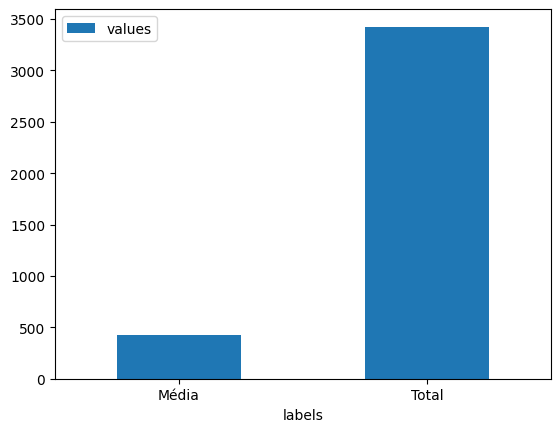

In [39]:
df.plot.bar(x='labels', y='values', rot=0)

In [40]:
df = pd.DataFrame(dados)

<Axes: xlabel='ANO'>

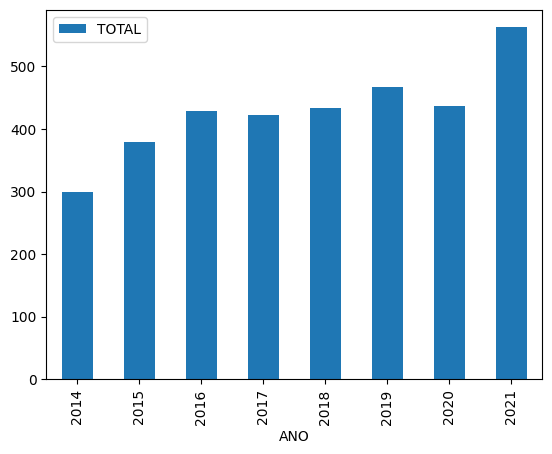

In [41]:
df.plot.bar(x='ANO', y='TOTAL')

In [42]:
taxa_crescimento = []
for i in range(1, len(dados['TOTAL'])):  # Começa do índice 1 para comparar com o anterior
    crescimento = ((dados['TOTAL'][i] - dados['TOTAL'][i-1]) / dados['TOTAL'][i-1]) * 100
    taxa_crescimento.append(crescimento)

In [43]:
taxa_crescimento

[26.755852842809364,
 12.928759894459102,
 -1.4018691588785046,
 2.6066350710900474,
 7.852193995381063,
 -6.638115631691649,
 28.899082568807337]

In [44]:
crescimento = {
    "Percentual": dados.loc[0:6,'ANO'],
    "values": taxa_crescimento
}

In [45]:
df = pd.DataFrame(crescimento)

<Axes: title={'center': 'Aumento Percentual'}, xlabel='Percentual'>

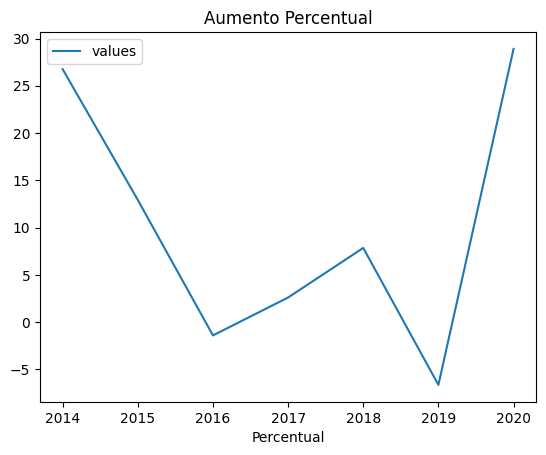

In [46]:
df.plot.line(x='Percentual', y='values', rot=0, title='Aumento Percentual')

In [47]:
mediana_total = dados['TOTAL'].median()

In [48]:
mediana_total

430.5

In [49]:

medidas = {
    'Titulos': ['Media', 'Mediana'],
    'Valores': [media_total, mediana_total]
}

In [50]:

df = pd.DataFrame(medidas)

<Axes: xlabel='Titulos'>

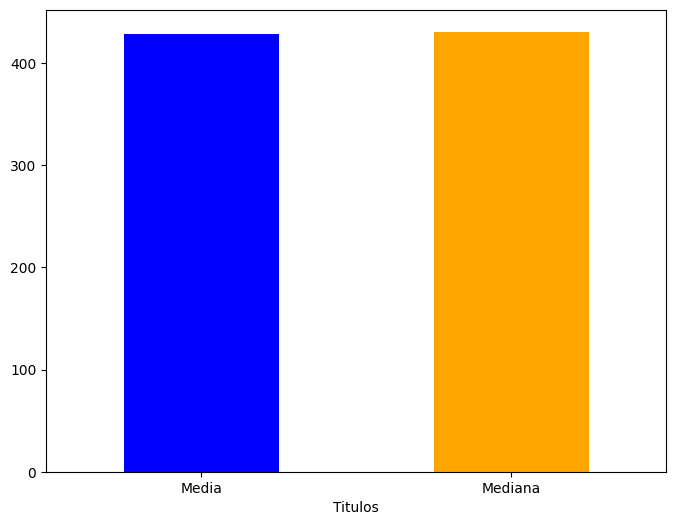

In [51]:
df.plot.bar(x='Titulos', y='Valores', figsize=(8, 6), color=['blue', 'orange', 'green'], legend=False, rot=0)


In [52]:
desvio_padrão = dados['TOTAL'].std()
desvio_padrão_p = dados['TOTAL'].std(ddof=0)

desvios = {
    'Titulos': ['Desvio Padrão', 'Desvio Padrão Populacional', 'Media'],
    'Valores': [desvio_padrão, desvio_padrão_p, media_total]
}


In [53]:
grafico_desvios = pd.DataFrame(desvios)

<Axes: title={'center': 'Desvios e media'}, xlabel='Titulos'>

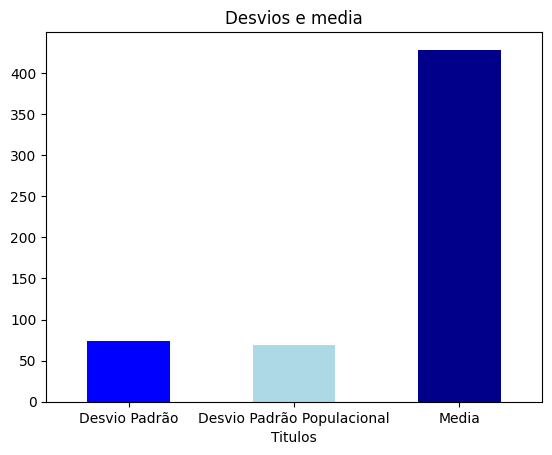

In [54]:
grafico_desvios.plot.bar(x='Titulos', y='Valores', rot=0, color=['Blue', 'LightBlue', 'darkBlue'], title='Desvios e media', legend=False)

In [68]:
dados.head(9)

,ANO,TOTAL
0,2014,299
1,2015,379
2,2016,428
3,2017,422
4,2018,433
5,2019,467
6,2020,436
7,2021,562


In [92]:
dados['ANO'] = pd.to_numeric(dados['ANO'], errors='coerce')
dados['TOTAL'] = pd.to_numeric(dados['TOTAL'], errors='coerce')

mediaX = pd.to_numeric(dados['ANO']).mean()
mediaY = dados['TOTAL'].mean()

coefAng = sum((dados['ANO'] - mediaX) * (dados['TOTAL'] - mediaY)) / sum((dados['ANO'] - mediaX) ** 2)

coefLin = mediaY - coefAng * mediaX

regLin = coefAng * 2022 + coefLin

dados.loc[len(dados)] = ["2022", regLin]

In [93]:
dados.head(9)

,ANO,TOTAL
0,2014,299.0
1,2015,379.0
2,2016,428.0
3,2017,422.0
4,2018,433.0
5,2019,467.0
6,2020,436.0
7,2021,562.0
8,2022,549.0


<Axes: title={'center': 'Previsão do Ano de 2022'}, xlabel='ANO'>

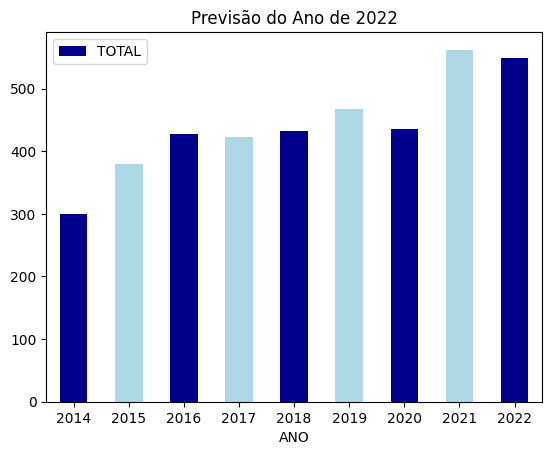

In [111]:
pd.DataFrame(dados).plot.bar(x='ANO', y='TOTAL', title='Previsão do Ano de 2022', rot=0, color=['darkblue', 'lightblue'])